In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from matplotlib import pyplot as plt

# 1. Load images
def load_data(image_dir, mask_dir, img_size=(128, 128)):
    images, masks = [], []
    for i in range(1, 4):  # You have 3 training samples
        img = cv2.imread(os.path.join(image_dir, f'image{i}.jpg'))
        img = cv2.resize(img, img_size)
        img = img / 255.0
        mask = cv2.imread(os.path.join(mask_dir, f'mask{i}.png'), cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, img_size)
        mask = (mask > 127).astype(np.float32)
        mask = np.expand_dims(mask, axis=-1)
        images.append(img)
        masks.append(mask)
    return np.array(images), np.array(masks)

# 2. Define a small U-Net-like model
def build_model(input_shape=(128, 128, 3)):
    inputs = layers.Input(input_shape)

    c1 = layers.Conv2D(8, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(8, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)

    c2 = layers.Conv2D(16, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(16, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    c3 = layers.Conv2D(32, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(32, 3, activation='relu', padding='same')(c3)

    u1 = layers.UpSampling2D()(c3)
    u1 = layers.Concatenate()([u1, c2])
    c4 = layers.Conv2D(16, 3, activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(16, 3, activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D()(c4)
    u2 = layers.Concatenate()([u2, c1])
    c5 = layers.Conv2D(8, 3, activation='relu', padding='same')(u2)
    c5 = layers.Conv2D(8, 3, activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c5)
    return models.Model(inputs, outputs)

# 3. Load data
X, Y = load_data("train", "train")
model = build_model()

# 4. Train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=30, verbose=1)

# 5. Predict on test images
test_dir = 'test'
output_dir = 'output/predicted_masks'
os.makedirs(output_dir, exist_ok=True)
for fname in os.listdir(test_dir):
    if not fname.endswith('.jpg'): continue
    img_path = os.path.join(test_dir, fname)
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (128, 128)) / 255.0
    pred = model.predict(np.expand_dims(img_resized, axis=0))[0, :, :, 0]
    pred_mask = (pred > 0.5).astype(np.uint8) * 255
    pred_mask_resized = cv2.resize(pred_mask, (img.shape[1], img.shape[0]))
    out_path = os.path.join(output_dir, fname.replace('.jpg', '_mask.png'))
    cv2.imwrite(out_path, pred_mask_resized)

print("Prediction complete. Masks saved in output/predicted_masks/")


ModuleNotFoundError: No module named 'cv2'

In [3]:
pip install tensorflow opencv-python numpy matplotlib


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 252.5 MB 483 kB/s eta 0:00:011
     |████████████████████████████████| 37.3 MB 531 kB/s eta 0:00:011
     |████████████████████████████████| 5.3 MB 26.6 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 17.9 MB/s eta 0:00:01
     |████████████████████████████████| 135 kB 75.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 25.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 16.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 62.5 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 24.6 MB/s eta 0:00:01
     |████████████████████████████████| 418 kB 49.5 MB/s eta 0:00:01
     |████████████████████████████████| 667 kB 26.2 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 1.3 MB/s  eta 0:00:01
     |████████████████████████████████| 1.4 MB 28.0 MB/s eta 0:00:01
     |███████████████████

In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from matplotlib import pyplot as plt

# 1. Load images
def load_data(image_dir, mask_dir, img_size=(128, 128)):
    images, masks = [], []
    for i in range(1, 4):  # You have 3 training samples
        img = cv2.imread(os.path.join(image_dir, f'image{i}.jpg'))
        img = cv2.resize(img, img_size)
        img = img / 255.0
        mask = cv2.imread(os.path.join(mask_dir, f'mask{i}.png'), cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, img_size)
        mask = (mask > 127).astype(np.float32)
        mask = np.expand_dims(mask, axis=-1)
        images.append(img)
        masks.append(mask)
    return np.array(images), np.array(masks)

# 2. Define a small U-Net-like model
def build_model(input_shape=(128, 128, 3)):
    inputs = layers.Input(input_shape)

    c1 = layers.Conv2D(8, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(8, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)

    c2 = layers.Conv2D(16, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(16, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    c3 = layers.Conv2D(32, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(32, 3, activation='relu', padding='same')(c3)

    u1 = layers.UpSampling2D()(c3)
    u1 = layers.Concatenate()([u1, c2])
    c4 = layers.Conv2D(16, 3, activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(16, 3, activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D()(c4)
    u2 = layers.Concatenate()([u2, c1])
    c5 = layers.Conv2D(8, 3, activation='relu', padding='same')(u2)
    c5 = layers.Conv2D(8, 3, activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c5)
    return models.Model(inputs, outputs)

# 3. Load data
X, Y = load_data("train", "train")
model = build_model()

# 4. Train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=30, verbose=1)

# 5. Predict on test images
test_dir = 'test'
output_dir = 'output/predicted_masks'
os.makedirs(output_dir, exist_ok=True)
for fname in os.listdir(test_dir):
    if not fname.endswith('.jpg'): continue
    img_path = os.path.join(test_dir, fname)
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (128, 128)) / 255.0
    pred = model.predict(np.expand_dims(img_resized, axis=0))[0, :, :, 0]
    pred_mask = (pred > 0.5).astype(np.uint8) * 255
    pred_mask_resized = cv2.resize(pred_mask, (img.shape[1], img.shape[0]))
    out_path = os.path.join(output_dir, fname.replace('.jpg', '_mask.png'))
    cv2.imwrite(out_path, pred_mask_resized)

print("Prediction complete. Masks saved in output/predicted_masks/")


/Users/Guest/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Matplotlib is building the font cache; this may take a moment.
[ WARN:0@35.403] global loadsave.cpp:268 findDecoder imread_('train/image1.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# === CONFIG ===
IMG_SIZE = (128, 128)
TRAIN_DIR = 'train'
TEST_DIR = 'test'
OUTPUT_DIR = 'output/predicted_masks'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === LOAD TRAINING DATA ===
def load_data(img_size=IMG_SIZE):
    images, masks = [], []
    for i in range(1, 4):  # 3 training examples
        img_path = os.path.join(TRAIN_DIR, f'input_{i}.jpg')
        mask_path = os.path.join(TRAIN_DIR, f'mask_{i}.png')

        print("Loading:", img_path, "and", mask_path)
        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if img is None or mask is None:
            raise FileNotFoundError(f"Missing file: {img_path} or {mask_path}")

        img = cv2.resize(img, img_size) / 255.0
        mask = cv2.resize(mask, img_size)
        mask = (mask > 127).astype(np.float32)
        mask = np.expand_dims(mask, axis=-1)

        images.append(img)
        masks.append(mask)
    
    return np.array(images), np.array(masks)

# === U-NET MODEL ===
def build_model(input_shape=(128, 128, 3)):
    inputs = layers.Input(input_shape)

    # Downsample
    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)

    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    # Bottleneck
    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(c3)

    # Upsample
    u1 = layers.UpSampling2D()(c3)
    u1 = layers.Concatenate()([u1, c2])
    c4 = layers.Conv2D(32, 3, activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(32, 3, activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D()(c4)
    u2 = layers.Concatenate()([u2, c1])
    c5 = layers.Conv2D(16, 3, activation='relu', padding='same')(u2)
    c5 = layers.Conv2D(16, 3, activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c5)
    return models.Model(inputs, outputs)

# === TRAIN ===
X, Y = load_data()
model = build_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=30, verbose=1)

# === PREDICT ON NEW TEST IMAGES ===
for fname in os.listdir(TEST_DIR):
    if fname.startswith('input_new') and fname.endswith('.jpg'):
        full_path = os.path.join(TEST_DIR, fname)
        print(f"Processing {fname}...")
        img = cv2.imread(full_path)
        if img is None:
            print("  Skipped (unreadable image).")
            continue

        original_shape = (img.shape[1], img.shape[0])  # (width, height)
        img_resized = cv2.resize(img, IMG_SIZE) / 255.0
        prediction = model.predict(np.expand_dims(img_resized, axis=0))[0, :, :, 0]
        mask_pred = (prediction > 0.5).astype(np.uint8) * 255
        mask_pred_resized = cv2.resize(mask_pred, original_shape)

        out_path = os.path.join(OUTPUT_DIR, fname.replace('.jpg', '_mask.png'))
        cv2.imwrite(out_path, mask_pred_resized)
        print("  Saved to", out_path)

print("✅ All predictions complete.")


Loading: train/input_1.jpg and train/mask_1.png
Loading: train/input_2.jpg and train/mask_2.png
Loading: train/input_3.jpg and train/mask_3.png
Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9167 - loss: 0.6772
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9383 - loss: 0.6182
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9383 - loss: 0.5542
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9453 - loss: 0.4532
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9459 - loss: 0.3371
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9459 - loss: 0.2819
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9459 - loss: 0.3355
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9459 - loss: 0.3342
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9459 - loss: 0.2949
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9459 - loss: 0.2709
Epoch 11/30
1/1 ━━━━━━━━━━━

In [7]:
import os
import re
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tqdm import tqdm

# === CONFIG ===
IMG_SIZE = (128, 128)
TRAIN_DIR = 'train'
TEST_DIR = 'test'
OUTPUT_DIR = 'output/predicted_masks'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Load all training image-mask pairs ===
def load_all_pairs(train_dir, img_size=(128, 128)):
    image_files = sorted([f for f in os.listdir(train_dir) if f.startswith('input_') and f.endswith('.jpg')])
    pairs = []
    for img_file in image_files:
        match = re.search(r'input_(\d+)\.jpg', img_file)
        if not match:
            continue
        index = match.group(1)
        mask_file = f'mask_{index}.png'
        img_path = os.path.join(train_dir, img_file)
        mask_path = os.path.join(train_dir, mask_file)

        if not os.path.exists(mask_path):
            print(f"Skipping {img_file} — no matching mask found.")
            continue

        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if img is None or mask is None:
            continue

        img = cv2.resize(img, img_size) / 255.0
        mask = cv2.resize(mask, img_size)
        mask = (mask > 127).astype(np.float32)
        mask = np.expand_dims(mask, axis=-1)

        pairs.append((img, mask))
    
    images, masks = zip(*pairs)
    return np.array(images), np.array(masks)

# === U-Net model ===
def build_model(input_shape=(128, 128, 3)):
    inputs = layers.Input(input_shape)

    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)

    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(c3)

    u1 = layers.UpSampling2D()(c3)
    u1 = layers.Concatenate()([u1, c2])
    c4 = layers.Conv2D(32, 3, activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(32, 3, activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D()(c4)
    u2 = layers.Concatenate()([u2, c1])
    c5 = layers.Conv2D(16, 3, activation='relu', padding='same')(u2)
    c5 = layers.Conv2D(16, 3, activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c5)
    return models.Model(inputs, outputs)

# === TRAIN ===
print("🔍 Loading training data...")
X, Y = load_all_pairs(TRAIN_DIR)
print(f"✔️ Loaded {len(X)} image-mask pairs.")

model = build_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=25, batch_size=2, verbose=1)

# === PREDICT ON TEST IMAGES ===
print("🔮 Generating predictions on test images...")
for fname in tqdm(os.listdir(TEST_DIR)):
    if fname.startswith('input_new') and fname.endswith('.jpg'):
        path = os.path.join(TEST_DIR, fname)
        img = cv2.imread(path)
        if img is None:
            continue

        original_shape = (img.shape[1], img.shape[0])
        img_resized = cv2.resize(img, IMG_SIZE) / 255.0
        pred = model.predict(np.expand_dims(img_resized, axis=0))[0, :, :, 0]
        pred = (pred > 0.25).astype(np.uint8) * 255  # lowered threshold
        pred_resized = cv2.resize(pred, original_shape)
        cv2.imwrite(os.path.join(OUTPUT_DIR, fname.replace('.jpg', '_mask.png')), pred_resized)

print("✅ Done. Masks saved in:", OUTPUT_DIR)


ModuleNotFoundError: No module named 'tqdm'

In [8]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 78 kB 8.7 MB/s eta 0:00:011
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import re
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tqdm import tqdm

# === CONFIG ===
IMG_SIZE = (128, 128)
TRAIN_DIR = 'train'
TEST_DIR = 'test'
OUTPUT_DIR = 'output/predicted_masks'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Load all training image-mask pairs ===
def load_all_pairs(train_dir, img_size=(128, 128)):
    image_files = sorted([f for f in os.listdir(train_dir) if f.startswith('input_') and f.endswith('.jpg')])
    pairs = []
    for img_file in image_files:
        match = re.search(r'input_(\d+)\.jpg', img_file)
        if not match:
            continue
        index = match.group(1)
        mask_file = f'mask_{index}.png'
        img_path = os.path.join(train_dir, img_file)
        mask_path = os.path.join(train_dir, mask_file)

        if not os.path.exists(mask_path):
            print(f"Skipping {img_file} — no matching mask found.")
            continue

        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if img is None or mask is None:
            continue

        img = cv2.resize(img, img_size) / 255.0
        mask = cv2.resize(mask, img_size)
        mask = (mask > 127).astype(np.float32)
        mask = np.expand_dims(mask, axis=-1)

        pairs.append((img, mask))
    
    images, masks = zip(*pairs)
    return np.array(images), np.array(masks)

# === U-Net model ===
def build_model(input_shape=(128, 128, 3)):
    inputs = layers.Input(input_shape)

    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)

    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(c3)

    u1 = layers.UpSampling2D()(c3)
    u1 = layers.Concatenate()([u1, c2])
    c4 = layers.Conv2D(32, 3, activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(32, 3, activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D()(c4)
    u2 = layers.Concatenate()([u2, c1])
    c5 = layers.Conv2D(16, 3, activation='relu', padding='same')(u2)
    c5 = layers.Conv2D(16, 3, activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c5)
    return models.Model(inputs, outputs)

# === TRAIN ===
print("🔍 Loading training data...")
X, Y = load_all_pairs(TRAIN_DIR)
print(f"✔️ Loaded {len(X)} image-mask pairs.")

model = build_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=25, batch_size=2, verbose=1)

# === PREDICT ON TEST IMAGES ===
print("🔮 Generating predictions on test images...")
for fname in tqdm(os.listdir(TEST_DIR)):
    if fname.startswith('input_new') and fname.endswith('.jpg'):
        path = os.path.join(TEST_DIR, fname)
        img = cv2.imread(path)
        if img is None:
            continue

        original_shape = (img.shape[1], img.shape[0])
        img_resized = cv2.resize(img, IMG_SIZE) / 255.0
        pred = model.predict(np.expand_dims(img_resized, axis=0))[0, :, :, 0]
        pred = (pred > 0.25).astype(np.uint8) * 255  # lowered threshold
        pred_resized = cv2.resize(pred, original_shape)
        cv2.imwrite(os.path.join(OUTPUT_DIR, fname.replace('.jpg', '_mask.png')), pred_resized)

print("✅ Done. Masks saved in:", OUTPUT_DIR)


/Users/Guest/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


🔍 Loading training data...
✔️ Loaded 6 image-mask pairs.
Epoch 1/25


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9538 - loss: 0.6479
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9554 - loss: 0.4281
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9564 - loss: 0.2927
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9562 - loss: 0.2670
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9567 - loss: 0.2571
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9554 - loss: 0.2470
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9595 - loss: 0.2194
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9536 - loss: 0.2390
Epoch 9/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9540 - loss: 0.2286
Epoch 10/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9557 - loss: 0.2202
Epoch 11/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9521 - loss: 0.2309
Epoch 12/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9586 - loss: 0.1951
Epoch 13/25


  0%|          | 0/3 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 33%|███▎      | 1/3 [00:00<00:00,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


100%|██████████| 3/3 [00:00<00:00, 13.67it/s]

✅ Done. Masks saved in: output/predicted_masks


In [2]:
import os
import re
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tqdm import tqdm

# === CONFIG ===
IMG_SIZE = (128, 128)
TRAIN_DIR = 'train'
TEST_DIR = 'test'
OUTPUT_DIR = 'output/predicted_masks'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Augmented dataset loader ===
def load_all_pairs_with_aug(train_dir, img_size=(128, 128)):
    image_files = sorted([f for f in os.listdir(train_dir) if f.startswith('input_') and f.endswith('.jpg')])
    images, masks = [], []

    for img_file in image_files:
        index = img_file.split('_')[1].split('.')[0]
        mask_file = f'mask_{index}.png'

        img_path = os.path.join(train_dir, img_file)
        mask_path = os.path.join(train_dir, mask_file)

        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if img is None or mask is None:
            print(f"Skipping {img_file} — could not read image or mask.")
            continue

        img = cv2.resize(img, img_size) / 255.0
        mask = cv2.resize(mask, img_size)
        mask = (mask > 127).astype(np.float32)
        mask = np.expand_dims(mask, axis=-1)

        # Add original
        images.append(img)
        masks.append(mask)

        # Add flipped horizontally
        images.append(np.flip(img, axis=1))
        masks.append(np.flip(mask, axis=1))

        # Add rotated 90 degrees (counter-clockwise)
        images.append(np.rot90(img))
        masks.append(np.rot90(mask))

    return np.array(images), np.array(masks)

# === U-Net model ===
def build_model(input_shape=(128, 128, 3)):
    inputs = layers.Input(input_shape)

    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)

    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(c3)

    u1 = layers.UpSampling2D()(c3)
    u1 = layers.Concatenate()([u1, c2])
    c4 = layers.Conv2D(32, 3, activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(32, 3, activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D()(c4)
    u2 = layers.Concatenate()([u2, c1])
    c5 = layers.Conv2D(16, 3, activation='relu', padding='same')(u2)
    c5 = layers.Conv2D(16, 3, activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c5)
    return models.Model(inputs, outputs)

# === Load training data with augmentation ===
print("🔍 Loading training data with augmentation...")
X, Y = load_all_pairs_with_aug(TRAIN_DIR)
print(f"✔️ Loaded {len(X)} image-mask pairs.")

# === Build and compile model ===
model = build_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# === Train model epoch-by-epoch with debug predictions ===
for epoch in range(1, 21):
    print(f"Epoch {epoch}")
    model.fit(X, Y, epochs=1, batch_size=2, verbose=1)

    # Debug prediction on first training sample
    pred = model.predict(np.expand_dims(X[0], axis=0))[0, :, :, 0]
    print(f" → Prediction stats: min={pred.min():.3f}, max={pred.max():.3f}, mean={pred.mean():.3f}")

# === Predict on test images ===
print("🔮 Generating predictions on test images...")
for fname in tqdm(os.listdir(TEST_DIR)):
    if fname.startswith('input_new') and fname.endswith('.jpg'):
        path = os.path.join(TEST_DIR, fname)
        img = cv2.imread(path)
        if img is None:
            print(f"Skipping {fname} — could not read image.")
            continue

        original_shape = (img.shape[1], img.shape[0])
        img_resized = cv2.resize(img, IMG_SIZE) / 255.0
        pred = model.predict(np.expand_dims(img_resized, axis=0))[0, :, :, 0]
        pred = (pred > 0.25).astype(np.uint8) * 255  # lowered threshold
        pred_resized = cv2.resize(pred, original_shape)
        cv2.imwrite(os.path.join(OUTPUT_DIR, fname.replace('.jpg', '_mask.png')), pred_resized)

print("✅ Done. Masks saved in:", OUTPUT_DIR)


🔍 Loading training data with augmentation...
✔️ Loaded 18 image-mask pairs.
Epoch 1


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9373 - loss: 0.5598
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
 → Prediction stats: min=0.000, max=0.462, mean=0.033
Epoch 2
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9539 - loss: 0.2780
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
 → Prediction stats: min=0.005, max=0.453, mean=0.074
Epoch 3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9574 - loss: 0.2298
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
 → Prediction stats: min=0.024, max=0.445, mean=0.120
Epoch 4
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9559 - loss: 0.2191
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
 → Prediction stats: min=0.024, max=0.411, mean=0.098
Epoch 5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9524 - loss: 0.2189
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 → Prediction stats: min=0.006, max=0.345, mean=0.073
Epoch 6
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9534 - loss: 0.1936
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
 → Prediction stats: min=0.000

  0%|          | 0/3 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


100%|██████████| 3/3 [00:00<00:00, 22.08it/s]

✅ Done. Masks saved in: output/predicted_masks


In [4]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.1 MB 444 kB/s eta 0:00:01
     |████████████████████████████████| 307 kB 63.1 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 441 kB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


/Users/Guest/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


🔍 Loading training data with augmentations...
✔️ Loaded 30 augmented image-mask pairs.
Training samples: 25, Validation samples: 5


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile



Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step - accuracy: 0.3658 - loss: 1.8870 - val_accuracy: 0.1206 - val_loss: 2.2170
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


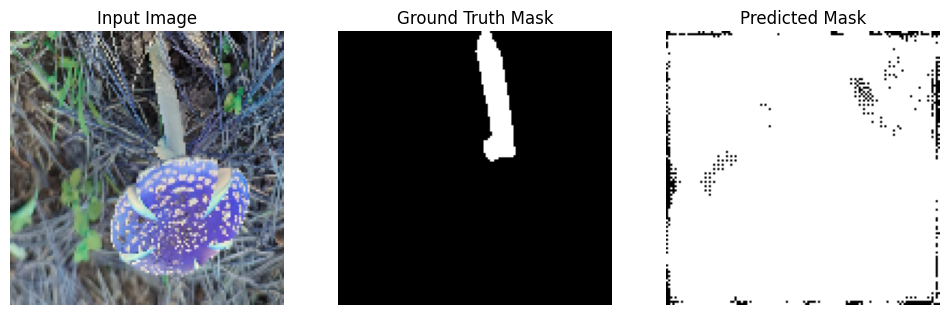


Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.8902 - loss: 1.4099 - val_accuracy: 0.0354 - val_loss: 21.9436
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


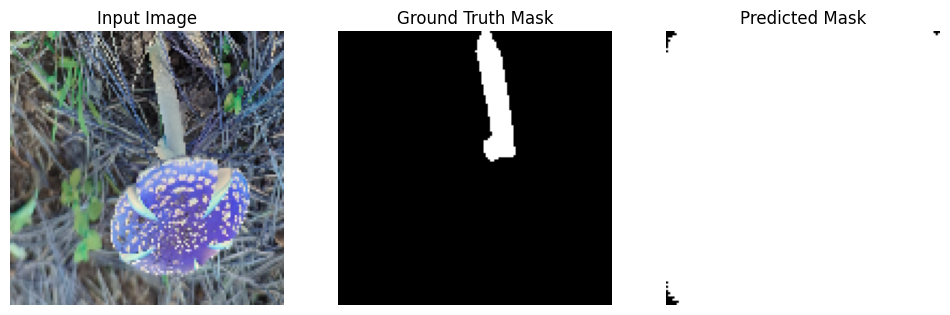


Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.9508 - loss: 1.2030 - val_accuracy: 0.0634 - val_loss: 135.2884
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


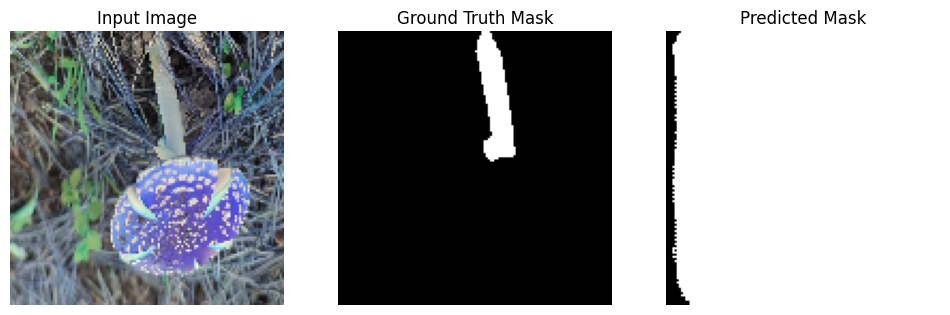


Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 0.9283 - loss: 1.2734 - val_accuracy: 0.1798 - val_loss: 9.6822
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


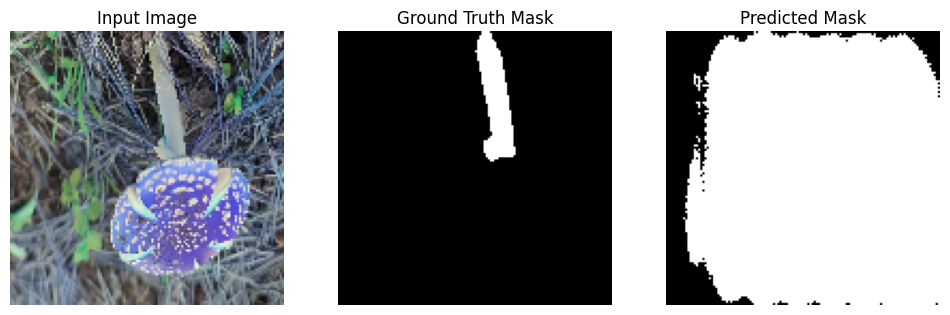


Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.9505 - loss: 1.1244 - val_accuracy: 0.0860 - val_loss: 72.8987
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


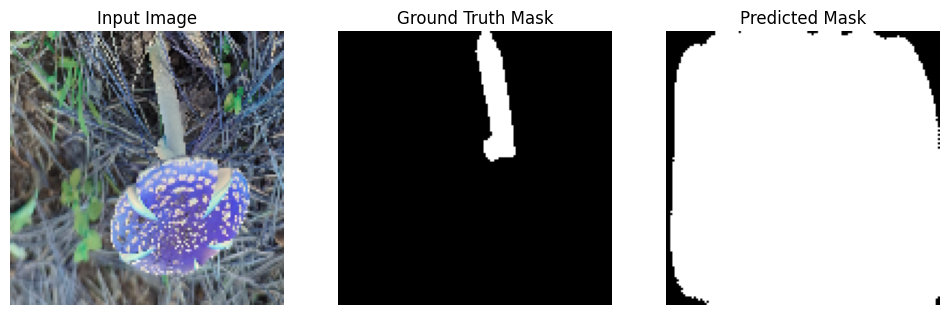


Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.9501 - loss: 1.1042 - val_accuracy: 0.0618 - val_loss: 348.5101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


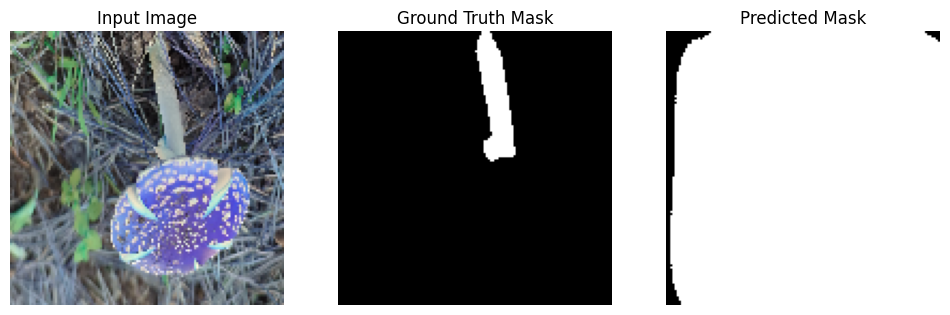


Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.9570 - loss: 1.0739 - val_accuracy: 0.1541 - val_loss: 128.3634
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


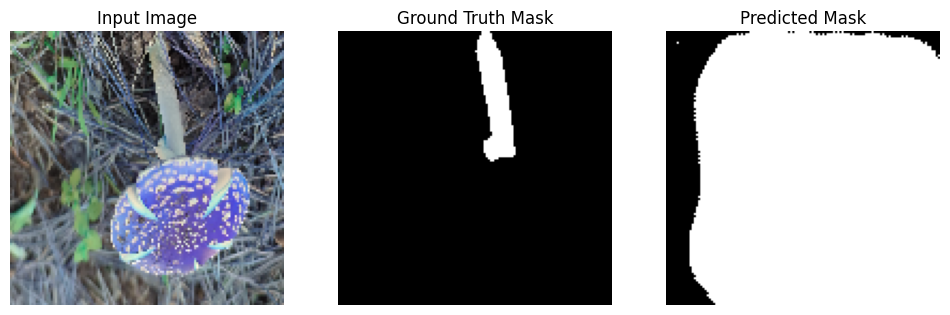


Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.9596 - loss: 0.9939 - val_accuracy: 0.3209 - val_loss: 63.5652
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


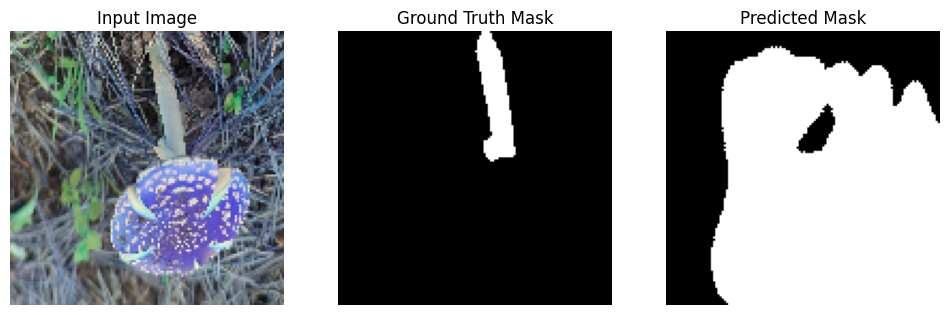


Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.9632 - loss: 0.9104 - val_accuracy: 0.4430 - val_loss: 18.2708
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


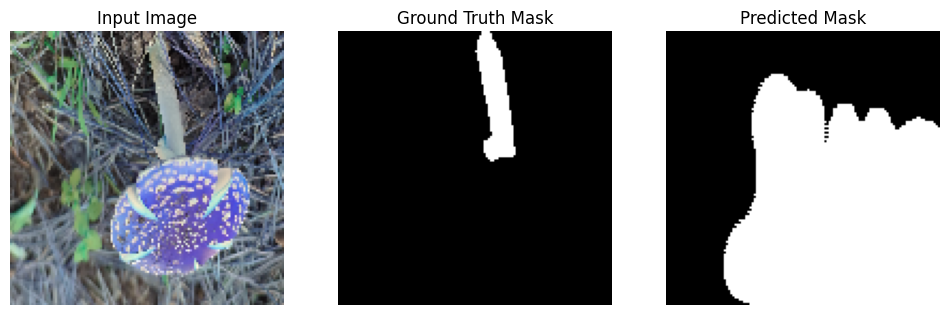


Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - accuracy: 0.9673 - loss: 0.8943 - val_accuracy: 0.4695 - val_loss: 8.0980
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


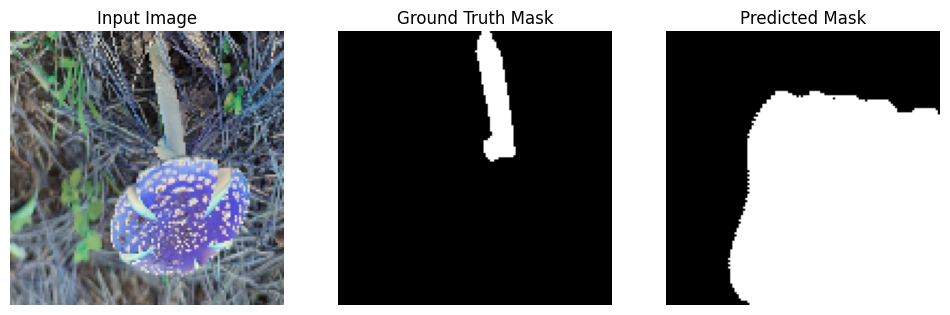


Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.9656 - loss: 0.8528 - val_accuracy: 0.5194 - val_loss: 6.6113
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


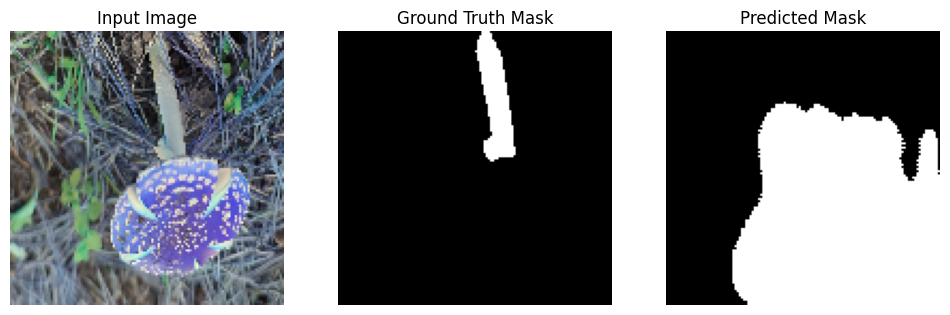


Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.9719 - loss: 0.7704 - val_accuracy: 0.8908 - val_loss: 1.3023
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


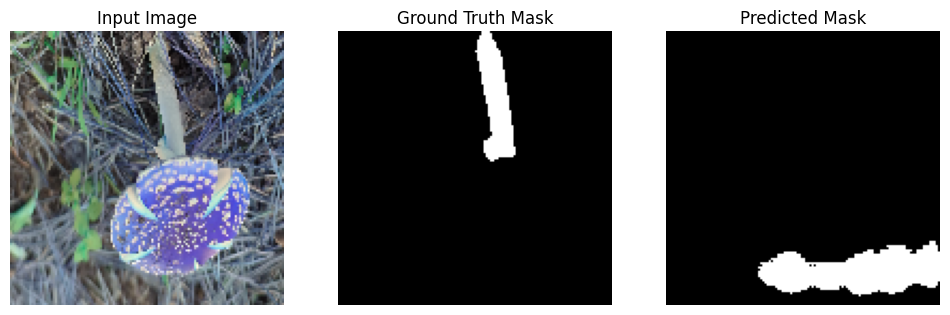


Epoch 13/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.9725 - loss: 0.7318 - val_accuracy: 0.9660 - val_loss: 1.2047
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


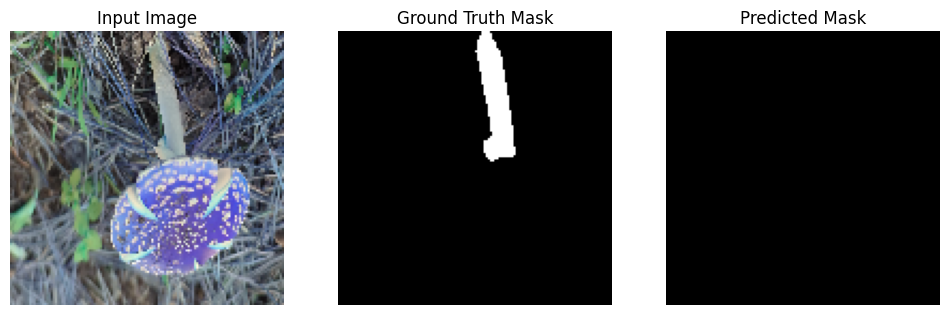


Epoch 14/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.9750 - loss: 0.6958 - val_accuracy: 0.9670 - val_loss: 1.1784
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


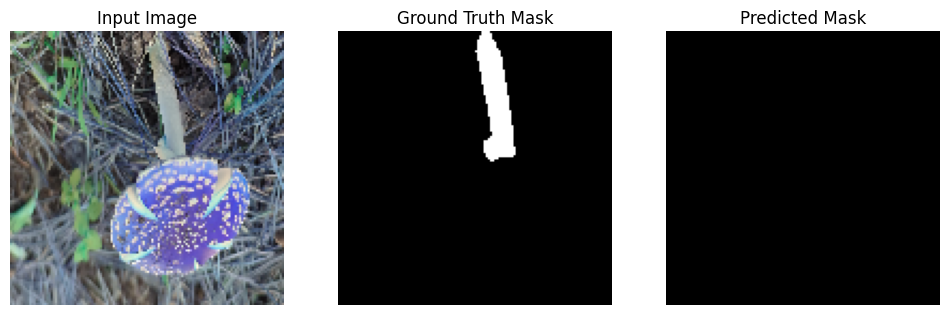


Epoch 15/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.9782 - loss: 0.6712 - val_accuracy: 0.9670 - val_loss: 1.1714
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


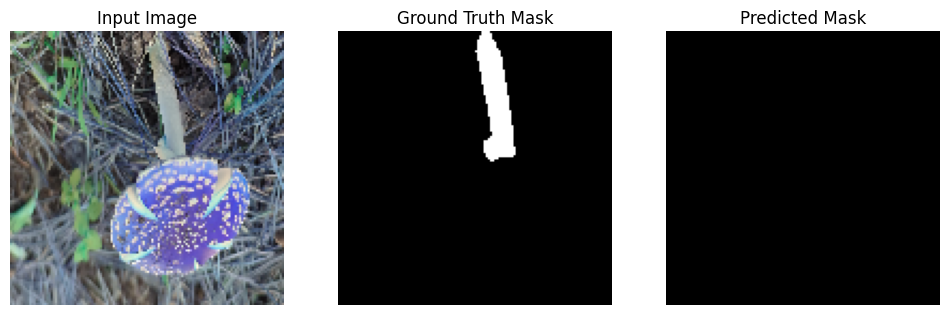


Epoch 16/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.9791 - loss: 0.6134 - val_accuracy: 0.9670 - val_loss: 1.1641
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


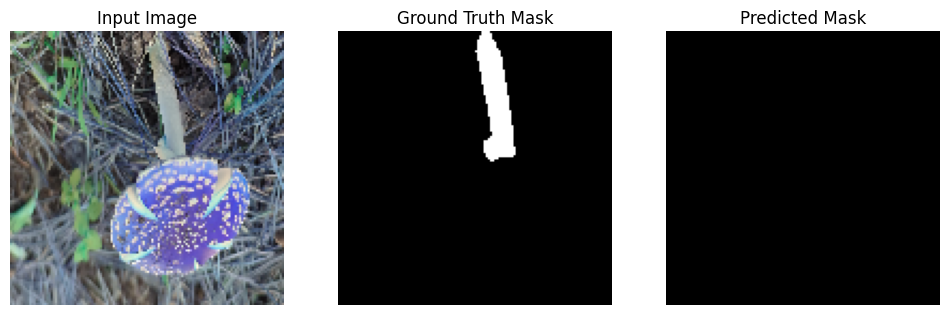


Epoch 17/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.9809 - loss: 0.5654 - val_accuracy: 0.9669 - val_loss: 1.1641
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


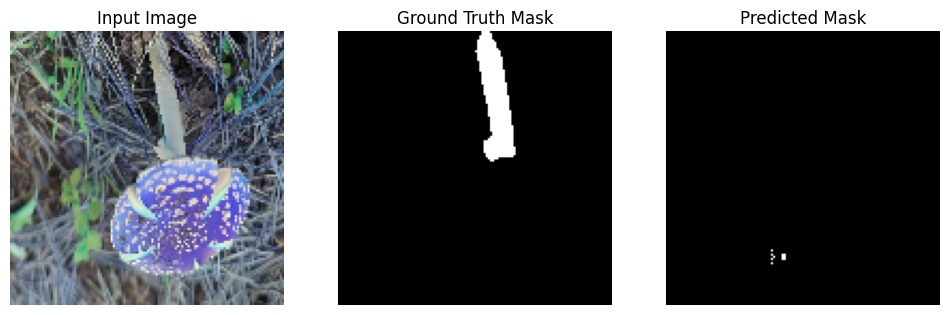


Epoch 18/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.9818 - loss: 0.5564 - val_accuracy: 0.9657 - val_loss: 1.1512
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


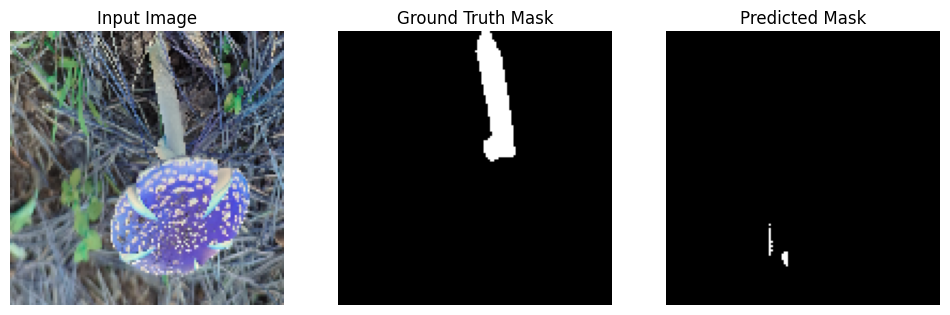


Epoch 19/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.9848 - loss: 0.5012 - val_accuracy: 0.5617 - val_loss: 2.3242
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


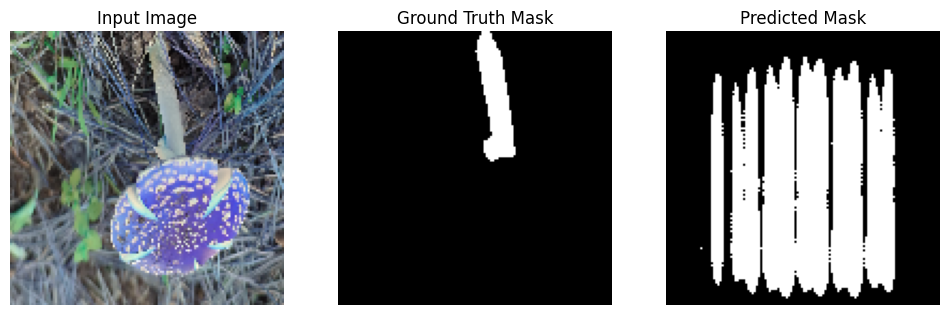


Epoch 20/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.9816 - loss: 0.5337 - val_accuracy: 0.9670 - val_loss: 1.1270
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


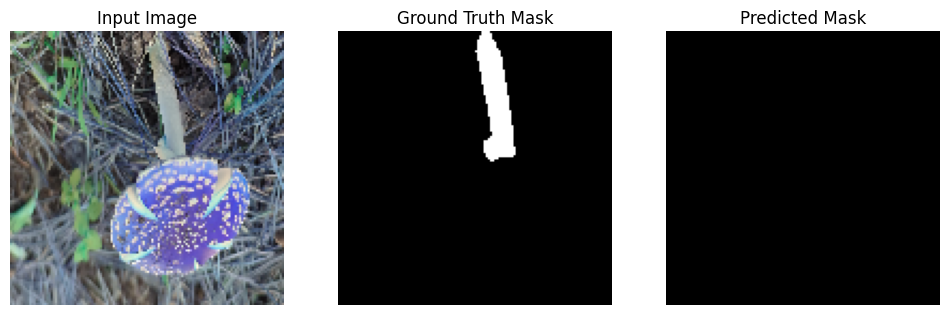


Epoch 21/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.9762 - loss: 0.5549 - val_accuracy: 0.9665 - val_loss: 1.1082
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


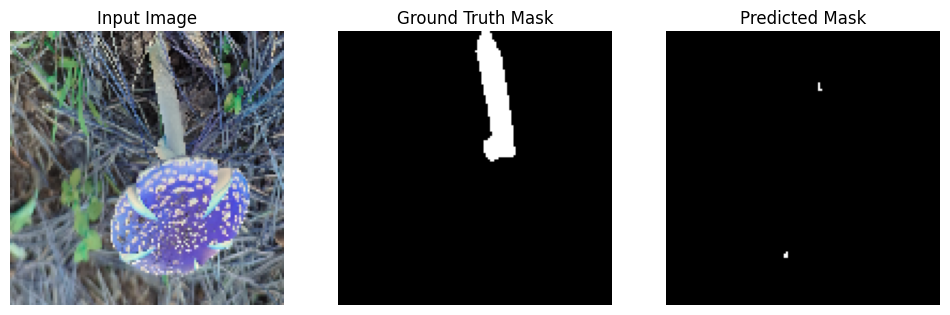


Epoch 22/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.9832 - loss: 0.4647 - val_accuracy: 0.9609 - val_loss: 1.1204
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


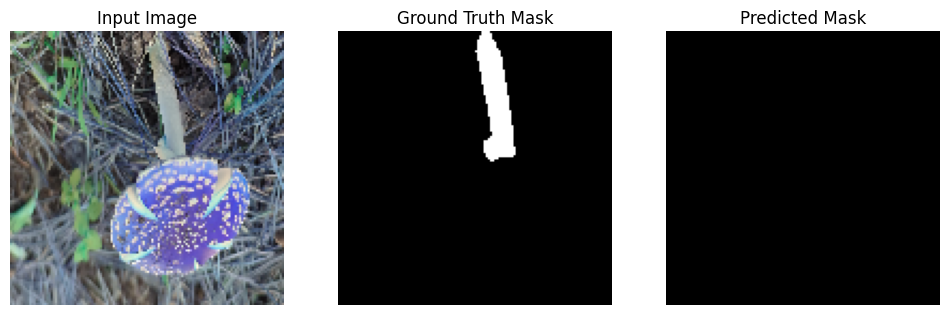


Epoch 23/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.9820 - loss: 0.4527 - val_accuracy: 0.6679 - val_loss: 1.8234
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


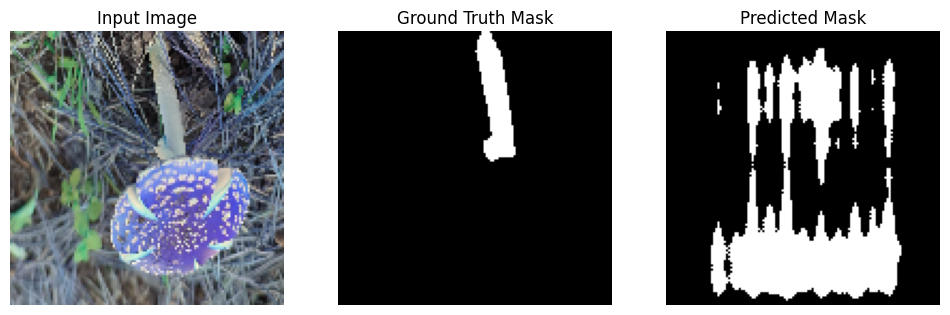


Epoch 24/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.9841 - loss: 0.4351 - val_accuracy: 0.4873 - val_loss: 3.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


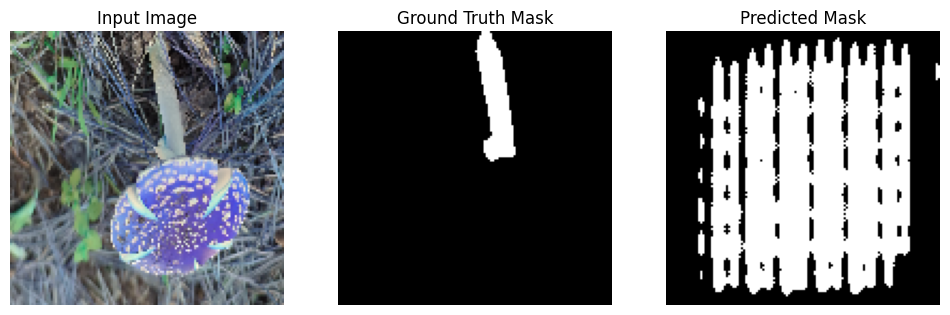


Epoch 25/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.9824 - loss: 0.4293 - val_accuracy: 0.7919 - val_loss: 1.3389
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


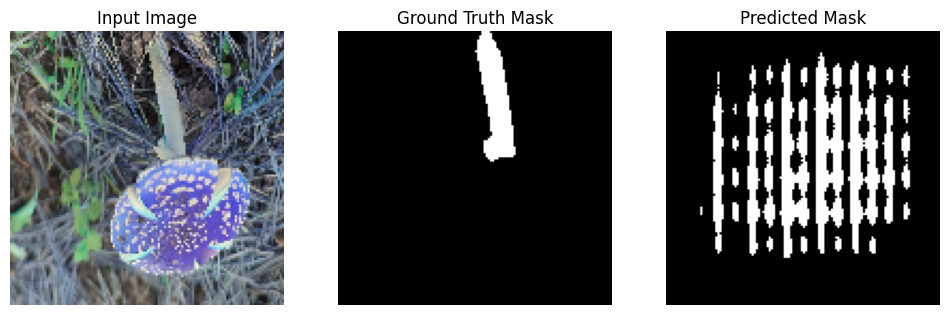


Epoch 26/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.9843 - loss: 0.4088 - val_accuracy: 0.5373 - val_loss: 2.3647
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


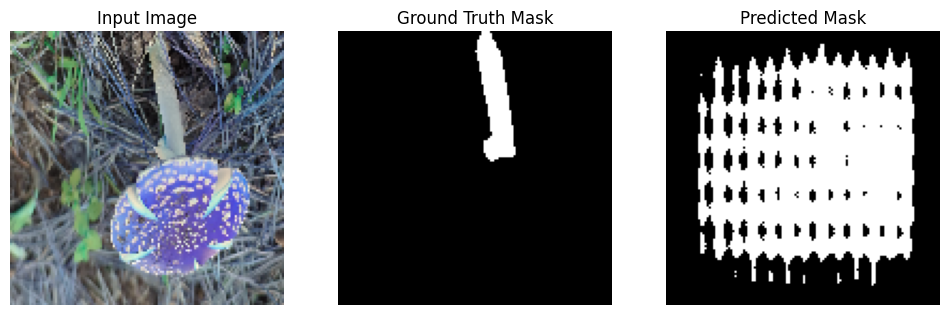


Epoch 27/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.9874 - loss: 0.3590 - val_accuracy: 0.8538 - val_loss: 1.1459
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


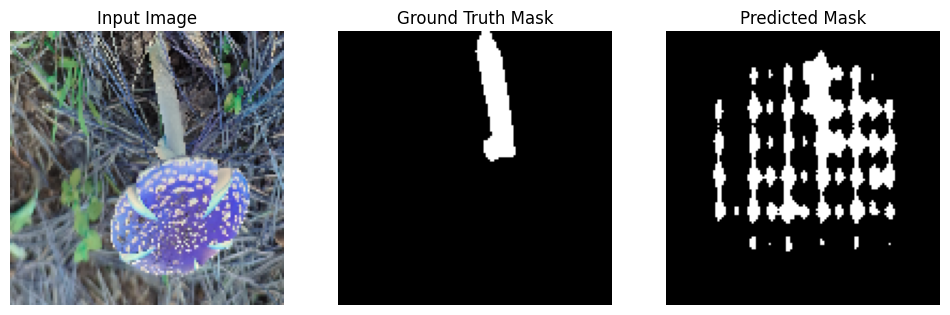


Epoch 28/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.9898 - loss: 0.3180 - val_accuracy: 0.9740 - val_loss: 0.9045
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


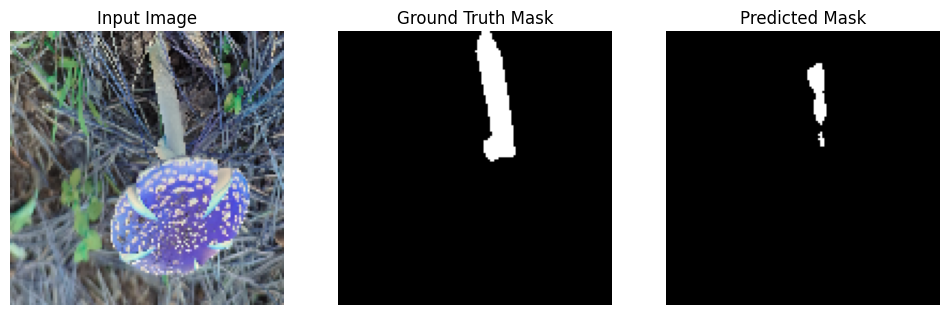


Epoch 29/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - accuracy: 0.9902 - loss: 0.3133 - val_accuracy: 0.9755 - val_loss: 0.8509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


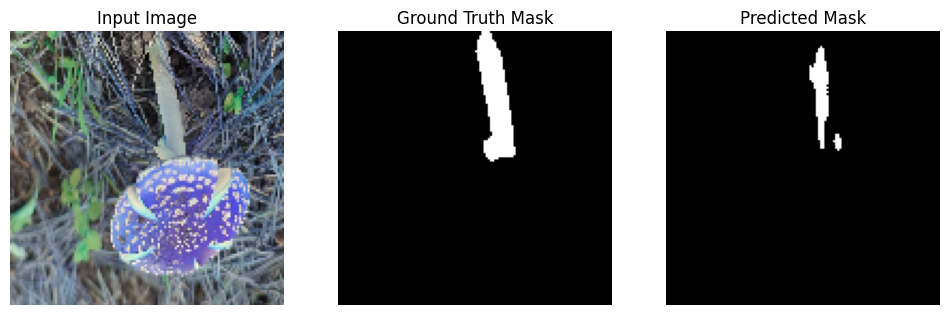


Epoch 30/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.9887 - loss: 0.2972 - val_accuracy: 0.9740 - val_loss: 0.8916
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


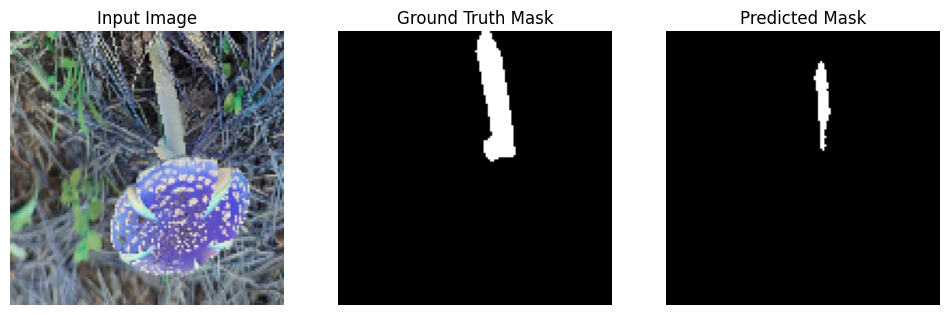

🔮 Generating predictions on test images...


  0%|          | 0/3 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 67%|██████▋   | 2/3 [00:00<00:00, 12.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


100%|██████████| 3/3 [00:00<00:00, 13.53it/s]

✅ Done. Masks saved in: output/predicted_masks


In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

# === CONFIG ===
IMG_SIZE = (128, 128)
TRAIN_DIR = 'train'
TEST_DIR = 'test'
OUTPUT_DIR = 'output/predicted_masks'
os.makedirs(OUTPUT_DIR, exist_ok=True)
PRED_THRESHOLD = 0.5  # Prediction threshold

# === Data loader with augmentations ===
def random_brightness(img):
    # Adjust brightness randomly between 0.7 and 1.3
    factor = np.random.uniform(0.7, 1.3)
    img = np.clip(img * factor, 0, 1)
    return img

def load_all_pairs_with_aug(train_dir, img_size=IMG_SIZE):
    image_files = sorted([f for f in os.listdir(train_dir) if f.startswith('input_') and f.endswith('.jpg')])
    images, masks = [], []

    for img_file in image_files:
        index = img_file.split('_')[1].split('.')[0]
        mask_file = f'mask_{index}.png'

        img_path = os.path.join(train_dir, img_file)
        mask_path = os.path.join(train_dir, mask_file)

        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if img is None or mask is None:
            print(f"Skipping {img_file} — could not read image or mask.")
            continue

        img = cv2.resize(img, img_size) / 255.0
        mask = cv2.resize(mask, img_size)
        mask = (mask > 127).astype(np.float32)
        mask = np.expand_dims(mask, axis=-1)

        # Original
        images.append(img)
        masks.append(mask)

        # Horizontal flip
        images.append(np.flip(img, axis=1))
        masks.append(np.flip(mask, axis=1))

        # Vertical flip
        images.append(np.flip(img, axis=0))
        masks.append(np.flip(mask, axis=0))

        # Rotated 90 degrees (counter-clockwise)
        images.append(np.rot90(img))
        masks.append(np.rot90(mask))

        # Brightness augmented original
        bright_img = random_brightness(img)
        images.append(bright_img)
        masks.append(mask)

    return np.array(images), np.array(masks)

# === Dice loss + BCE combined ===
def dice_loss(y_true, y_pred):
    smooth = 1e-6
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def combined_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    d_loss = dice_loss(y_true, y_pred)
    return bce + d_loss

# === Improved U-Net model with batchnorm & dropout ===
def build_model(input_shape=(128, 128, 3)):
    inputs = layers.Input(input_shape)

    def conv_block(x, filters):
        x = layers.Conv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Conv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        return x

    c1 = conv_block(inputs, 32)
    p1 = layers.MaxPooling2D()(c1)
    p1 = layers.Dropout(0.1)(p1)

    c2 = conv_block(p1, 64)
    p2 = layers.MaxPooling2D()(c2)
    p2 = layers.Dropout(0.1)(p2)

    c3 = conv_block(p2, 128)
    p3 = layers.MaxPooling2D()(c3)
    p3 = layers.Dropout(0.2)(p3)

    c4 = conv_block(p3, 256)
    p4 = layers.MaxPooling2D()(c4)
    p4 = layers.Dropout(0.2)(p4)

    c5 = conv_block(p4, 512)

    u6 = layers.Conv2DTranspose(256, 2, strides=2, padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    u6 = layers.Dropout(0.2)(u6)
    c6 = conv_block(u6, 256)

    u7 = layers.Conv2DTranspose(128, 2, strides=2, padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    u7 = layers.Dropout(0.2)(u7)
    c7 = conv_block(u7, 128)

    u8 = layers.Conv2DTranspose(64, 2, strides=2, padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    u8 = layers.Dropout(0.1)(u8)
    c8 = conv_block(u8, 64)

    u9 = layers.Conv2DTranspose(32, 2, strides=2, padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    u9 = layers.Dropout(0.1)(u9)
    c9 = conv_block(u9, 32)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# === Load data ===
print("🔍 Loading training data with augmentations...")
X, Y = load_all_pairs_with_aug(TRAIN_DIR)
print(f"✔️ Loaded {len(X)} augmented image-mask pairs.")

# Split data into train and validation
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=42)
print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")

# === Build and compile model ===
model = build_model(input_shape=(*IMG_SIZE, 3))
model.compile(optimizer='adam', loss=combined_loss, metrics=['accuracy'])

# === Training with validation and visualization ===
EPOCHS = 30
BATCH_SIZE = 4

for epoch in range(1, EPOCHS + 1):
    print(f"\nEpoch {epoch}/{EPOCHS}")
    history = model.fit(X_train, Y_train, 
                        validation_data=(X_val, Y_val),
                        epochs=1, batch_size=BATCH_SIZE, verbose=1)

    # Predict on first validation image for quick visualization
    pred = model.predict(np.expand_dims(X_val[0], axis=0))[0, :, :, 0]

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.title("Input Image")
    plt.imshow(X_val[0])
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(Y_val[0].squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(pred > PRED_THRESHOLD, cmap='gray')
    plt.axis('off')

    plt.show()

# === Predict on test set ===
print("🔮 Generating predictions on test images...")
for fname in tqdm(os.listdir(TEST_DIR)):
    if fname.startswith('input_new') and fname.endswith('.jpg'):
        path = os.path.join(TEST_DIR, fname)
        img = cv2.imread(path)
        if img is None:
            print(f"Skipping {fname} — could not read image.")
            continue

        original_shape = (img.shape[1], img.shape[0])
        img_resized = cv2.resize(img, IMG_SIZE) / 255.0
        pred = model.predict(np.expand_dims(img_resized, axis=0))[0, :, :, 0]
        pred_mask = (pred > PRED_THRESHOLD).astype(np.uint8) * 255
        pred_resized = cv2.resize(pred_mask, original_shape)
        cv2.imwrite(os.path.join(OUTPUT_DIR, fname.replace('.jpg', '_mask.png')), pred_resized)

print("✅ Done. Masks saved in:", OUTPUT_DIR)


In [17]:
import os
import re
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tqdm import tqdm

#CONFIG
IMG_SIZE = (128, 128)
TRAIN_DIR = 'train'
TEST_DIR = 'test'
OUTPUT_DIR = 'output/predicted_masks'
os.makedirs(OUTPUT_DIR, exist_ok=True)

#Augmented dataset loader
def load_all_pairs_with_aug(train_dir, img_size=(128, 128)):
    image_files = sorted([f for f in os.listdir(train_dir) if f.startswith('input_') and f.endswith('.jpg')])
    images, masks = [], []

    for img_file in image_files:
        index = img_file.split('_')[1].split('.')[0]
        mask_file = f'mask_{index}.png'

        img_path = os.path.join(train_dir, img_file)
        mask_path = os.path.join(train_dir, mask_file)

        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if img is None or mask is None:
            print(f"Skipping {img_file} — could not read image or mask.")
            continue

        img = cv2.resize(img, img_size) / 255.0
        mask = cv2.resize(mask, img_size)
        mask = (mask > 127).astype(np.float32)
        mask = np.expand_dims(mask, axis=-1)

        #Original
        images.append(img)
        masks.append(mask)

        #Horizontal flip
        images.append(np.flip(img, axis=1))
        masks.append(np.flip(mask, axis=1))

        #Vertical flip
        images.append(np.flip(img, axis=0))
        masks.append(np.flip(mask, axis=0))

        #180 degree rotation
        images.append(np.rot90(img, k=2))
        masks.append(np.rot90(mask, k=2))

        #Horizontal flip + 180 rotation
        img_flip_h = np.flip(img, axis=1)
        mask_flip_h = np.flip(mask, axis=1)
        images.append(np.rot90(img_flip_h, k=2))
        masks.append(np.rot90(mask_flip_h, k=2))

        #Vertical flip + 180 rotation
        img_flip_v = np.flip(img, axis=0)
        mask_flip_v = np.flip(mask, axis=0)
        images.append(np.rot90(img_flip_v, k=2))
        masks.append(np.rot90(mask_flip_v, k=2))

    return np.array(images), np.array(masks)



# === U-Net model ===
def build_model(input_shape=(128, 128, 3)):
    inputs = layers.Input(input_shape)

    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)

    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(c3)

    u1 = layers.UpSampling2D()(c3)
    u1 = layers.Concatenate()([u1, c2])
    c4 = layers.Conv2D(32, 3, activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(32, 3, activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D()(c4)
    u2 = layers.Concatenate()([u2, c1])
    c5 = layers.Conv2D(16, 3, activation='relu', padding='same')(u2)
    c5 = layers.Conv2D(16, 3, activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c5)
    return models.Model(inputs, outputs)

#Load training data with augmentation
print("🔍 Loading training data with augmentation...")
X, Y = load_all_pairs_with_aug(TRAIN_DIR)
print(f"✔️ Loaded {len(X)} image-mask pairs.")

#Build and compile model 
model = build_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train model epoch-by-epoch with debug predictions
for epoch in range(1, 101):
    print(f"Epoch {epoch}")
    model.fit(X, Y, epochs=1, batch_size=2, verbose=1)

    # Debug prediction on first training sample
    pred = model.predict(np.expand_dims(X[0], axis=0))[0, :, :, 0]
    print(f" → Prediction stats: min={pred.min():.3f}, max={pred.max():.3f}, mean={pred.mean():.3f}")

#Predict on test images
print("Generating predictions on test images...")
for fname in tqdm(os.listdir(TEST_DIR)):
    if fname.startswith('input_new') and fname.endswith('.jpg'):
        path = os.path.join(TEST_DIR, fname)
        img = cv2.imread(path)
        if img is None:
            print(f"Skipping {fname} — could not read image.")
            continue

        original_shape = (img.shape[1], img.shape[0])
        img_resized = cv2.resize(img, IMG_SIZE) / 255.0
        pred = model.predict(np.expand_dims(img_resized, axis=0))[0, :, :, 0]
        pred = (pred > 0.25).astype(np.uint8) * 255
        pred_resized = cv2.resize(pred, original_shape)
        cv2.imwrite(os.path.join(OUTPUT_DIR, fname.replace('.jpg', '_mask.png')), pred_resized)

print("✅ Done. Masks saved in:", OUTPUT_DIR)

🔍 Loading training data with augmentation...


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


✔️ Loaded 60 image-mask pairs.
Epoch 1
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8564 - loss: 0.5636
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
 → Prediction stats: min=0.127, max=0.476, mean=0.281
Epoch 2
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8167 - loss: 0.5200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
 → Prediction stats: min=0.028, max=0.432, mean=0.138
Epoch 3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8722 - loss: 0.3974
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
 → Prediction stats: min=0.000, max=0.399, mean=0.112
Epoch 4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8599 - loss: 0.3705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
 → Prediction stats: min=0.000, max=0.429, mean=0.094
Epoch 5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8453 - loss: 0.3427
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
 → Prediction stats: min=0.001, max=0.491, mean=0.216
Epoch 6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8590 - loss: 0.3708
1/1 ━━━━━━━━━━━━━

  0%|          | 0/3 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


100%|██████████| 3/3 [00:00<00:00, 22.13it/s]

✅ Done. Masks saved in: output/predicted_masks
